<a href="https://colab.research.google.com/github/KumarSatyam24/TASK-7-Tiny-SQLite-Database-using-Python/blob/main/day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Step 1: Connect to SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [17]:
cursor.execute("DROP TABLE IF EXISTS sales")


In [18]:
# Step 2: Create a simple sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    region TEXT,
    date TEXT
)
""")

In [19]:
# Step 3: Insert dummy data (skip if data already exists)
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Apples", 10, 1.5, "North", "2024-01-10"),
        ("Bananas", 20, 0.8, "South", "2024-01-15"),
        ("Oranges", 15, 1.2, "East", "2024-02-01"),
        ("Apples", 5, 1.5, "West", "2024-02-10"),
        ("Bananas", 10, 0.8, "North", "2024-03-05"),
        ("Oranges", 10, 1.2, "South", "2024-03-20"),
        ("Grapes", 8, 2.0, "East", "2024-04-10"),
        ("Apples", 20, 1.6, "North", "2024-04-15"),
        ("Grapes", 15, 2.1, "West", "2024-05-01"),
        ("Oranges", 5, 1.3, "East", "2024-05-10"),
        ("Bananas", 12, 0.85, "West", "2024-06-12")
    ]
    cursor.executemany("""
        INSERT INTO sales (product, quantity, price, region, date)
        VALUES (?, ?, ?, ?, ?)
    """, sample_data)
    conn.commit()

In [20]:
# Step 4: Run SQL query for basic sales summary
query1 = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
"""
df1 = pd.read_sql_query(query1, conn)
print("\nProduct Sales Summary:\n", df1)


Product Sales Summary:
    product  total_qty  revenue
0   Apples         35     54.5
1  Bananas         42     34.2
2   Grapes         23     47.5
3  Oranges         30     36.5


In [21]:
# Step 5: Query 2 - Revenue by region
query2 = """
SELECT
    region,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY region
"""
df2 = pd.read_sql_query(query2, conn)
print("\nRevenue by Region:\n", df2)


Revenue by Region:
   region  revenue
0   East     40.5
1  North     55.0
2  South     28.0
3   West     49.2


In [22]:
# Step 6: Query 3 - Monthly Sales Summary
query3 = """
SELECT
    SUBSTR(date, 1, 7) AS month,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY month
ORDER BY month
"""
df3 = pd.read_sql_query(query3, conn)
print("\nMonthly Revenue:\n", df3)


Monthly Revenue:
      month  revenue
0  2024-01     31.0
1  2024-02     25.5
2  2024-03     20.0
3  2024-04     48.0
4  2024-05     38.0
5  2024-06     10.2


In [23]:
# Step 7: Query 4 - Top-selling product by quantity
query4 = """
SELECT product, SUM(quantity) AS total_qty
FROM sales
GROUP BY product
ORDER BY total_qty DESC
LIMIT 1
"""
df4 = pd.read_sql_query(query4, conn)
print("\nTop-Selling Product:\n", df4)


Top-Selling Product:
    product  total_qty
0  Bananas         42


In [24]:
# Step 8: Query 5 - Average price per product
query5 = """
SELECT
    product,
    ROUND(AVG(price), 2) AS avg_price
FROM sales
GROUP BY product
"""
df5 = pd.read_sql_query(query5, conn)
print("\nAverage Price Per Product:\n", df5)


Average Price Per Product:
    product  avg_price
0   Apples       1.53
1  Bananas       0.82
2   Grapes       2.05
3  Oranges       1.23


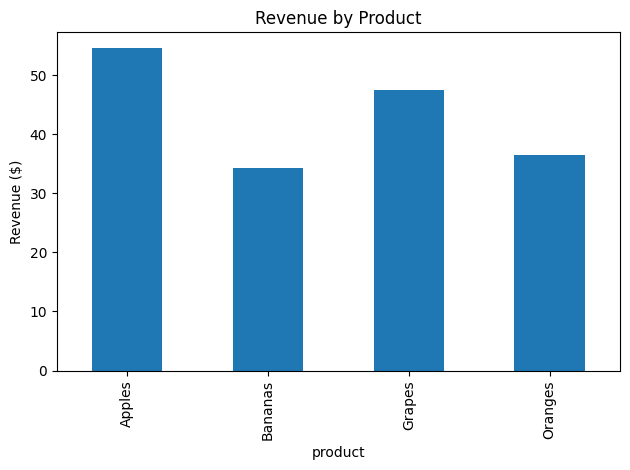

In [25]:
# Step 9: Bar chart - Revenue by product
df1.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


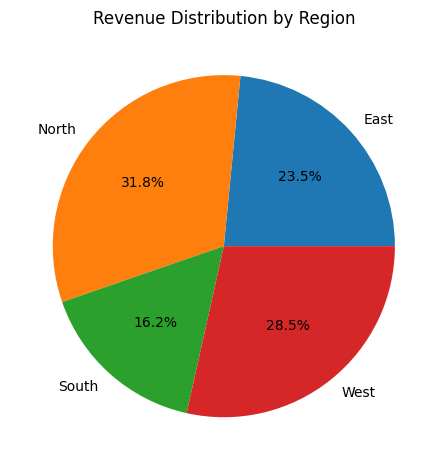

In [26]:
# Step 10: plot revenue by region
df2.plot(kind='pie', y='revenue', labels=df2['region'], autopct='%1.1f%%', legend=False)
plt.title('Revenue Distribution by Region')
plt.ylabel("")
plt.tight_layout()
plt.show()

In [27]:
# Close the database connection
conn.close()